In [6]:
import pandas as pd


In [ ]:
# Task1

In [43]:
df=pd.read_csv("netflix_titles.csv")

In [7]:
print(df.head())
print(df.tail())


  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [8]:
a=df.shape[0]
b=df.shape[1]
print("Number of rows=",a)
print("Number of columns=",b)


Number of rows= 8807
Number of columns= 12


In [9]:
print(df['country'].nunique())


748


In [10]:
tv_shows = df[df['type'] == 'TV Show']
print(tv_shows)


     show_id     type                  title         director  \
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
5         s6  TV Show          Midnight Mass    Mike Flanagan   
...      ...      ...                    ...              ...   
8795   s8796  TV Show        Yu-Gi-Oh! Arc-V              NaN   
8796   s8797  TV Show             Yunus Emre              NaN   
8797   s8798  TV Show              Zak Storm              NaN   
8800   s8801  TV Show     Zindagi Gulzar Hai              NaN   
8803   s8804  TV Show            Zombie Dumb              NaN   

                                                   cast  \
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...   
3                                         

In [11]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
print(df[['title', 'date_added', 'year_added', 'month_added']].head())


                   title date_added  year_added  month_added
0   Dick Johnson Is Dead 2021-09-25      2021.0          9.0
1          Blood & Water 2021-09-24      2021.0          9.0
2              Ganglands 2021-09-24      2021.0          9.0
3  Jailbirds New Orleans 2021-09-24      2021.0          9.0
4           Kota Factory 2021-09-24      2021.0          9.0


In [12]:
movies_2019 = df[(df['type'] == 'Movie') & (df['release_year'] == 2019)]
print(len(movies_2019))


633


In [13]:
print(df['rating'].value_counts())


rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64


In [ ]:
#Task2

In [14]:
df = pd.read_csv("world_population.csv")
print("Top 10 Rows:\n", df.head(10), "\n")

Top 10 Rows:
    Rank CCA3    Country/Territory           Capital      Continent  \
0    36  AFG          Afghanistan             Kabul           Asia   
1   138  ALB              Albania            Tirana         Europe   
2    34  DZA              Algeria           Algiers         Africa   
3   213  ASM       American Samoa         Pago Pago        Oceania   
4   203  AND              Andorra  Andorra la Vella         Europe   
5    42  AGO               Angola            Luanda         Africa   
6   224  AIA             Anguilla        The Valley  North America   
7   201  ATG  Antigua and Barbuda      Saint John’s  North America   
8    33  ARG            Argentina      Buenos Aires  South America   
9   140  ARM              Armenia           Yerevan           Asia   

   2022 Population  2020 Population  2015 Population  2010 Population  \
0         41128771         38972230         33753499         28189672   
1          2842321          2866849          2882481          2913399

In [15]:
print("Null Values:\n", df.isnull().sum(), "\n")
df = df.dropna()

Null Values:
 Rank                           0
CCA3                           0
Country/Territory              0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64 



In [16]:
top_5_pop = df.sort_values(by='2020 Population', ascending=False).head(5)
print("Top 5 Most Populous Countries:\n", top_5_pop[['Country/Territory', '2020 Population']], "\n")

Top 5 Most Populous Countries:
     Country/Territory  2020 Population
41              China       1424929781
92              India       1396387127
221     United States        335942003
93          Indonesia        271857970
156          Pakistan        227196741 



In [18]:
filtered = df[(df['2020 Population'] > 100_000_000) & (df['Area (km²)'] < 500_000)]
print("Countries with Population > 100M and Area < 500,000 km²:\n", filtered[['Country/Territory', '2020 Population', 'Area (km²)']], "\n")


Countries with Population > 100M and Area < 500,000 km²:
     Country/Territory  2020 Population  Area (km²)
16         Bangladesh        167420951      147570
102             Japan        125244761      377930
163       Philippines        112190977      342353 



In [19]:
sorted_density = df.sort_values(by='Density (per km²)', ascending=False)
print("Top 5 Countries by Population Density:\n", sorted_density[['Country/Territory', 'Density (per km²)']].head(5))

Top 5 Countries by Population Density:
     Country/Territory  Density (per km²)
119             Macau         23172.2667
134            Monaco         18234.5000
187         Singapore          8416.4634
89          Hong Kong          6783.3922
76          Gibraltar          5441.5000


In [ ]:
#Task3

In [23]:
matches = pd.read_csv("matches.csv")
deliveries = pd.read_csv("deliveries.csv")

In [24]:
most_successful_team = matches['winner'].value_counts().idxmax()
wins = matches['winner'].value_counts().max()
print(f"Most successful team: {most_successful_team} with {wins} wins\n")

Most successful team: Mumbai Indians with 144 wins



In [25]:
season_counts = matches['season'].value_counts().sort_index()
print("Total matches played per season:\n", season_counts, "\n")

Total matches played per season:
 season
2007/08    58
2009       57
2009/10    60
2011       73
2012       74
2013       76
2014       60
2015       59
2016       60
2017       59
2018       60
2019       60
2020/21    60
2021       60
2022       74
2023       74
2024       71
Name: count, dtype: int64 



In [26]:
top_players = matches['player_of_match'].value_counts().head(5)
print("Top 5 Player of the Match award winners:\n", top_players, "\n")

Top 5 Player of the Match award winners:
 player_of_match
AB de Villiers    25
CH Gayle          22
RG Sharma         19
DA Warner         18
V Kohli           18
Name: count, dtype: int64 



In [27]:
merged = pd.merge(deliveries, matches, left_on='match_id', right_on='id')
print("Merged Data Sample:\n", merged.head())

Merged Data Sample:
    match_id  inning           batting_team                 bowling_team  over  \
0    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
1    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
2    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
3    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
4    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   

   ball       batter   bowler  non_striker  batsman_runs  ...  toss_decision  \
0     1   SC Ganguly  P Kumar  BB McCullum             0  ...          field   
1     2  BB McCullum  P Kumar   SC Ganguly             0  ...          field   
2     3  BB McCullum  P Kumar   SC Ganguly             0  ...          field   
3     4  BB McCullum  P Kumar   SC Ganguly             0  ...          field   
4     5  BB McCullum  P Kumar   SC Ganguly             0  ...          field   

           

In [31]:

import matplotlib.pyplot as plt

In [ ]:
#Task4

In [32]:
df=pd.read_csv("StudentsPerformance.csv")

In [33]:
average_scores = df[['math score', 'reading score', 'writing score']].mean()
print("Average Scores:\n", average_scores, "\n")

Average Scores:
 math score       66.089
reading score    69.169
writing score    68.054
dtype: float64 



In [34]:
avg_writing_by_gender = df.groupby('gender')['writing score'].mean()
print("Average Writing Score by Gender:\n", avg_writing_by_gender, "\n")
better_writer = avg_writing_by_gender.idxmax()
print(f"{better_writer.capitalize()}s performed better in writing with an average score of {avg_writing_by_gender.max():.2f}\n")

Average Writing Score by Gender:
 gender
female    72.467181
male      63.311203
Name: writing score, dtype: float64 

Females performed better in writing with an average score of 72.47



In [35]:
df['total score'] = df[['math score', 'reading score', 'writing score']].sum(axis=1)
df['percentage'] = df['total score'] / 300 * 100
print(df[['math score', 'reading score', 'writing score', 'total score', 'percentage']].head(), "\n")


   math score  reading score  writing score  total score  percentage
0          72             72             74          218   72.666667
1          69             90             88          247   82.333333
2          90             95             93          278   92.666667
3          47             57             44          148   49.333333
4          76             78             75          229   76.333333 



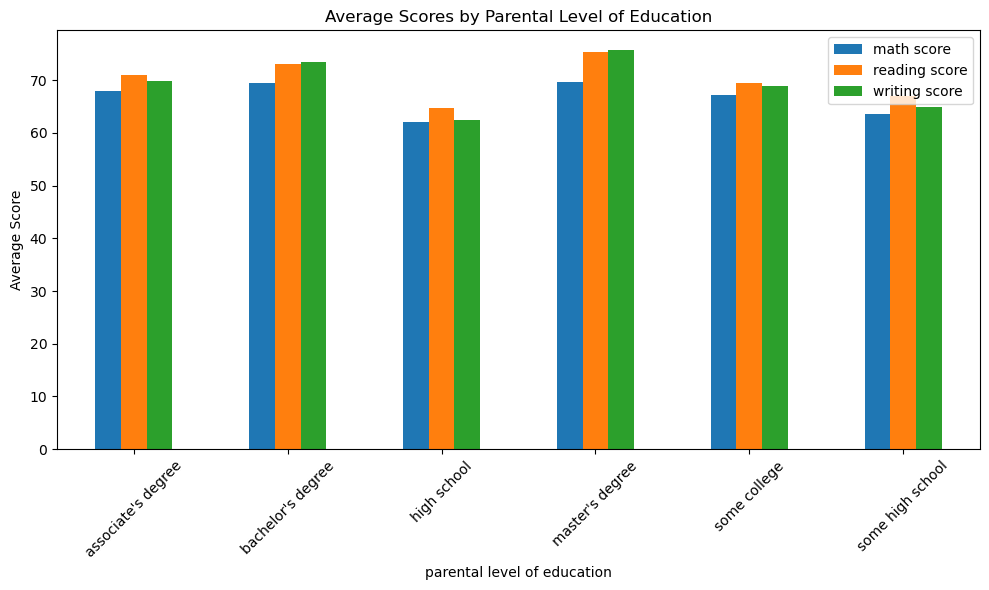

In [36]:
avg_scores = df.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean()
avg_scores.plot(kind='bar', figsize=(10, 6))
plt.title('Average Scores by Parental Level of Education')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [37]:
top_students = df[df['percentage'] > 90]
print("Students scoring above 90%:\n", top_students.head())

Students scoring above 90%:
      gender race/ethnicity parental level of education     lunch  \
2    female        group B             master's degree  standard   
6    female        group B                some college  standard   
104    male        group C                some college  standard   
106  female        group D             master's degree  standard   
114  female        group E           bachelor's degree  standard   

    test preparation course  math score  reading score  writing score  \
2                      none          90             95             93   
6                 completed          88             95             92   
104               completed          98             86             90   
106                    none          87            100            100   
114               completed          99            100            100   

     total score  percentage  
2            278   92.666667  
6            275   91.666667  
104          274   91.333333  

In [40]:
print("\n=== Statistical Summary ===")
print(df.describe(include='all'))


=== Statistical Summary ===
           Unnamed: 0  airline  flight source_city departure_time   stops  \
count   300153.000000   300153  300153      300153         300153  300153   
unique            NaN        6    1561           6              6       3   
top               NaN  Vistara  UK-706       Delhi        Morning     one   
freq              NaN   127859    3235       61343          71146  250863   
mean    150076.000000      NaN     NaN         NaN            NaN     NaN   
std      86646.852011      NaN     NaN         NaN            NaN     NaN   
min          0.000000      NaN     NaN         NaN            NaN     NaN   
25%      75038.000000      NaN     NaN         NaN            NaN     NaN   
50%     150076.000000      NaN     NaN         NaN            NaN     NaN   
75%     225114.000000      NaN     NaN         NaN            NaN     NaN   
max     300152.000000      NaN     NaN         NaN            NaN     NaN   

       arrival_time destination_city    class 

In [ ]:
#TAsk5

In [60]:
df = pd.read_csv("Clean_Dataset.csv")



In [61]:
print("=== .info() ===")
print(df.info())
print("\n=== .describe() ===")
print(df.describe(include='all'))

=== .info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB
None

=== .describe() ===
           Unnamed: 0  airline  flight source_city departure_time   stops  \
count   300153.000000   300153  300

In [66]:
time_map = {
    'Early_Morning': '05:00',
    'Morning': '08:00',
    'Afternoon': '13:00',
    'Evening': '18:00',
    'Night': '21:00',
    'Late_Night': '23:30'
}
if 'departure_time' in df.columns:
    df['departure_datetime'] = df['departure_time'].map(time_map)
    df['departure_datetime'] = pd.to_datetime(df['departure_datetime'], format='%H:%M', errors='coerce').dt.time
if 'arrival_time' in df.columns:
    df['arrival_datetime'] = df['arrival_time'].map(time_map)
    df['arrival_datetime'] = pd.to_datetime(df['arrival_datetime'], format='%H:%M', errors='coerce').dt.time
print(df[['departure_time', 'departure_datetime', 'arrival_time', 'arrival_datetime']].head())

  departure_time departure_datetime   arrival_time arrival_datetime
0        Evening           18:00:00          Night         21:00:00
1  Early_Morning           05:00:00        Morning         08:00:00
2  Early_Morning           05:00:00  Early_Morning         05:00:00
3        Morning           08:00:00      Afternoon         13:00:00
4        Morning           08:00:00        Morning         08:00:00


In [67]:
today = pd.to_datetime("2025-01-01")
df['Date_of_Journey'] = today + pd.to_timedelta(df['days_left'], unit='D')
df['Journey_Day'] = df['Date_of_Journey'].dt.day
df['Journey_Month'] = df['Date_of_Journey'].dt.month
print(df[['days_left', 'Date_of_Journey', 'Journey_Day', 'Journey_Month']].head())

   days_left Date_of_Journey  Journey_Day  Journey_Month
0          1      2025-01-02            2              1
1          1      2025-01-02            2              1
2          1      2025-01-02            2              1
3          1      2025-01-02            2              1
4          1      2025-01-02            2              1


In [68]:
if 'airline' in df.columns:
    most_common_airline = df['airline'].mode()[0]
    print("Most Frequent Airline:", most_common_airline)


if 'source_city' in df.columns:
    most_common_source = df['source_city'].mode()[0]
    print("Most Frequent Source City:", most_common_source)

Most Frequent Airline: Vistara
Most Frequent Source City: Delhi


In [69]:
df = df.drop_duplicates()


df = df.dropna()


print("Shape after cleaning:", df.shape)
print("\nSample cleaned data:")
print(df.head())


Shape after cleaning: (300153, 17)

Sample cleaned data:
   Unnamed: 0   airline   flight source_city departure_time stops  \
0           0  SpiceJet  SG-8709       Delhi        Evening  zero   
1           1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2           2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3           3   Vistara   UK-995       Delhi        Morning  zero   
4           4   Vistara   UK-963       Delhi        Morning  zero   

    arrival_time destination_city    class  duration  days_left  price  \
0          Night           Mumbai  Economy      2.17          1   5953   
1        Morning           Mumbai  Economy      2.33          1   5953   
2  Early_Morning           Mumbai  Economy      2.17          1   5956   
3      Afternoon           Mumbai  Economy      2.25          1   5955   
4        Morning           Mumbai  Economy      2.33          1   5955   

  departure_datetime arrival_datetime Date_of_Journey  Journey_Day  \
0           1